In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import math as ma
main_df = pd.read_pickle("/Users/kristophernolte/Documents/GitHub/helcaraxe/pdb_analysis/PDB_REPORT_pkl/pdb_meta_tab.pkl")
main_df = main_df.reset_index(drop = True)
main_df["Deposition Date"] = pd.to_datetime(main_df["Deposition Date"])

In [2]:
main_df = main_df.loc[(main_df['I_ice'] != np.nan) & (main_df['F_ice'] != np.nan)]
ice_df = main_df.loc[(main_df['I_ice'] > 0) | (main_df['F_ice'] > 0)]

In [3]:
"""ice_position = np.load("/Users/kristophernolte/Documents/GitHub/helcaraxe/pdb_analysis/PDB_REPORT_pkl/pdb_ice_tab.npy", allow_pickle=True)
only_pos = pd.DataFrame(np.concatenate(ice_position[:,1]))
only_pos[0].value_counts()"""

'ice_position = np.load("/Users/kristophernolte/Documents/GitHub/helcaraxe/pdb_analysis/PDB_REPORT_pkl/pdb_ice_tab.npy", allow_pickle=True)\nonly_pos = pd.DataFrame(np.concatenate(ice_position[:,1]))\nonly_pos[0].value_counts()'

In [4]:
#pd.DataFrame(main_df["Deposition Date"].groupby(main_df["Deposition Date"].dt.year).count())
np.mean(ice_df.loc[(ice_df['Deposition Date'].dt.year < 2020)]["Reflections For Refinement"])

46810.25600459482

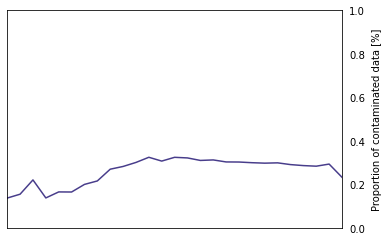

In [10]:
plt.close()
dates_pd = pd.DataFrame(main_df["Deposition Date"].groupby(main_df["Deposition Date"].dt.year).count())
ice_dates_pd = pd.DataFrame(ice_df["Deposition Date"].groupby(ice_df["Deposition Date"].dt.year).count())
dates_pd["prop"] =ice_dates_pd['Deposition Date'] / dates_pd['Deposition Date']
data_amount = dates_pd["Deposition Date"]

def standard_error (amount, prop):
    se = 1.96*ma.sqrt(prop*(1-prop)/amount)
    return se

error_list = []
for data in data_amount:
    se = standard_error(data,0.28)
    error_list.append(se)

y=dates_pd["prop"]
x=dates_pd["prop"].keys()
plt.plot(x,y, color = "darkslateblue")
#plt.fill_between(x, y-error_list, y+error_list, alpha=0.5,color = "darkslateblue" )
plt.ylabel("[%]")
plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
plt.tick_params(left=False)
plt.ylabel('Proportion of contaminated data [%]', labelpad=-375, fontsize=10)
plt.xlim(1995,2021)
plt.ylim(0,1)
plt.xticks([])
plt.savefig("progession_ice.svg", transparent=True)

In [11]:
ice_df.loc[(ice_df['Deposition Date'].dt.year < 2020)]["Reflections For Refinement"]

0         18569.0
3         17916.0
5         32909.0
8         44968.0
12         3462.0
           ...   
146105    57026.0
146107    14008.0
146110    40754.0
146112    22409.0
146115    88882.0
Name: Reflections For Refinement, Length: 38680, dtype: float64

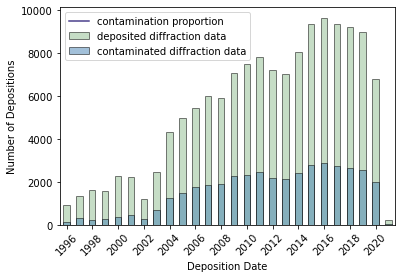

In [7]:
main_df 
main_df["Deposition Date"].loc[(main_df["Deposition Date"].dt.year > 1995)].groupby(main_df["Deposition Date"].dt.year).count().plot(kind="bar", alpha = 0.5, color="darkseagreen", edgecolor="black", label="deposited diffraction data")
ice_df["Deposition Date"].loc[(ice_df["Deposition Date"].dt.year > 1995)].groupby(ice_df["Deposition Date"].dt.year).count().plot(kind="bar", alpha = 0.5, color="steelblue", edgecolor="black", label="contaminated diffraction data")
dates_pd["prop"].plot(label="contamination proportion", color="darkslateblue")
plt.ylabel("Number of Depositions")
plt.xticks(rotation=45)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
plt.savefig("ice_contamination_pdb.svg")

(0.0, 100000.0)

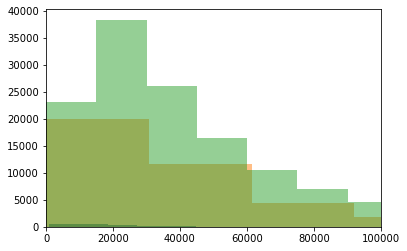

In [72]:
main_df['Collection Temperature'] = main_df['Collection Temperature'].astype("float64")
warm_ice_df = ice_df[(ice_df['Collection Temperature'] > 273)]
plt.hist(warm_ice_df["Reflections For Refinement"],bins=100)
plt.hist(ice_df["Reflections For Refinement"],alpha=0.5,bins=100)
plt.hist(main_df["Reflections For Refinement"],alpha=0.5,bins=1000)
plt.xlim(0, 100000)

In [26]:
#convert to type
#main_df["High Resolution Limit"] = main_df["High Resolution Limit"].astype("float64")

#access index for postion
#drop_ind = main_df[(main_df["High Resolution Limit"] > 4)].index
#drop_ind = main_df[(main_df["Collection Temperature"] > 273.0) & (main_df['F_ice'] > 0)].index

#change based on condition
#main_df.loc[main_df['I_ice'] > 0, 'I_ice'] = 1

In [27]:
"""#convert ice prediction in binary
main_df.loc[main_df['I_ice'] > 0, 'I_ice'] = 1
main_df.loc[main_df['F_ice'] > 0, 'F_ice'] = 1
main_df.loc[main_df['I_ice'] < 0, 'I_ice'] = np.nan
main_df.loc[main_df['F_ice'] < 0, 'F_ice'] = np.nan

main_df["F_ice"].value_counts()
main_df["I_ice"].value_counts()"""